In [1]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np

from Utils import *
from constants import *

from Environment import *
from Non_Stationary_Environment import *

from Social_influence import *
from Network import Network

from Simulation import *

from Ecommerce import *
from Ecommerce3 import *
from Ecommerce4 import *
from Ecommerce5 import *
from Ecommerce6 import *

In [8]:

# -----------STEP 5------------
gpucb_rewards_per_experiment = []
gpts_rewards_per_experiment = []

opts = []

for e in tqdm(range(0, n_experiments), position=0, desc="n_experiment", leave=False):
    env, nodes_activation_probabilities, num_sold_items, observations_probabilities = generate_new_environment()

    ecomm5_gpts = Ecommerce5_GPTS(
        B_cap, budgets, product_prices)
    ecomm5_ucb = Ecommerce5_UCB(
        B_cap, budgets, product_prices)

    for t in tqdm(range(0, T), position=1, desc="n_iteration", leave=False):
        arm, arm_idx = ecomm5_ucb.pull_arm()
        reward = env.round_step5(arm)
        ecomm5_ucb.update(arm_idx, reward)

        arm, arm_idx = ecomm5_gpts.pull_arm()
        reward = env.round_step5(arm)
        ecomm5_gpts.update(arm_idx, reward)

    gpucb_rewards_per_experiment.append(ecomm5_ucb.collected_rewards)
    gpts_rewards_per_experiment.append(ecomm5_gpts.collected_rewards)

    opts.append(np.max(env.get_network().get_adjacency_matrix()))

# plot_regrets_step5(gpts_rewards_per_experiment=gpts_rewards_per_experiment,
#                     gpucb_rewards_per_experiment=gpucb_rewards_per_experiment, opts=opts)

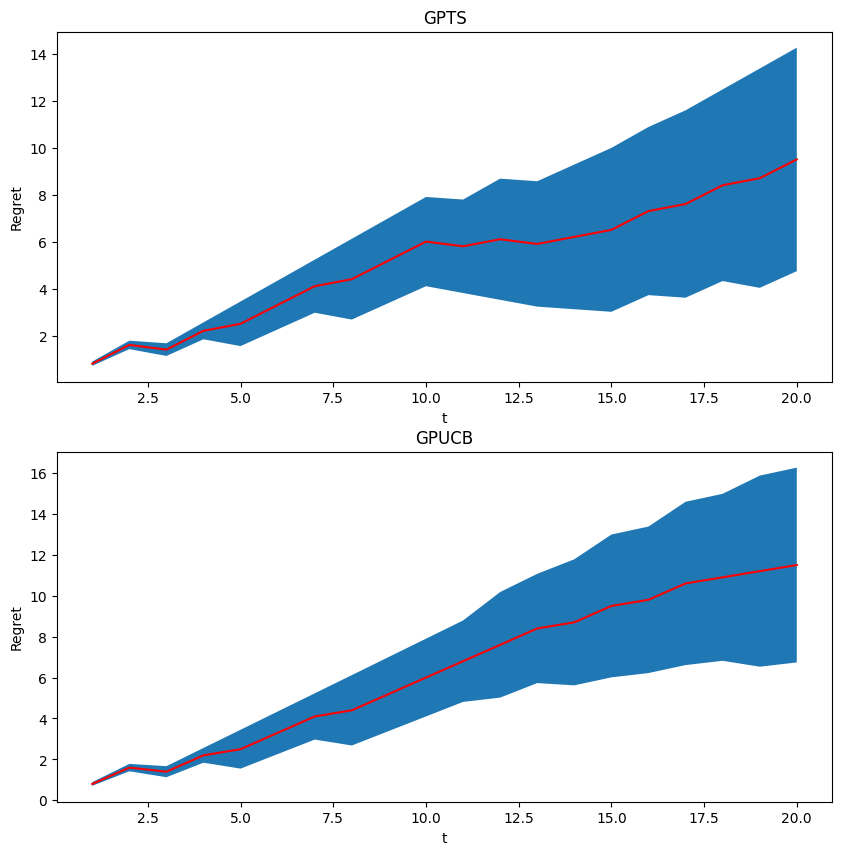

In [13]:
from matplotlib import pyplot as plt
gpts_rewards_per_experiment = np.array(gpts_rewards_per_experiment)
gpucb_rewards_per_experiment = np.array(gpucb_rewards_per_experiment)
opts = np.array(opts)

gpts_regret = np.cumsum(
    np.mean((opts - gpts_rewards_per_experiment.T).T, axis=0))
gpucb_regret = np.cumsum(
    np.mean((opts - gpucb_rewards_per_experiment.T).T, axis=0))

gpts_std_regret = np.cumsum(np.std((opts - gpts_rewards_per_experiment.T).T, axis=0))
gpucb_std_regret = np.cumsum(np.std((opts - gpts_rewards_per_experiment.T).T, axis=0))

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ticks = np.arange(start=1, stop=T + 1, step=1)

ax[0].plot(ticks, gpts_regret, color='r')
ax[0].fill_between(ticks, gpts_regret - gpts_std_regret, gpts_regret + gpts_std_regret, alpha = 0.4)
ax[0].set_xlabel('t')
ax[0].set_ylabel('Regret')
ax[0].set_title('GPTS')

ax[1].plot(ticks, gpucb_regret, color='r')
ax[1].fill_between(ticks, gpucb_regret - gpucb_std_regret, gpucb_regret + gpucb_std_regret)
ax[1].set_xlabel('t')
ax[1].set_ylabel('Regret')
ax[1].set_title('GPUCB')


plt.show()